In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

from collections import Counter
from utils import *

In [3]:
tools=["optitype",'T1K','hlahd','hisat',"arcas",'rna2hla',"seq2hla","hlaforest","phlat","hlavbseq",'hlaminer']
my_order=["Optitype","T1K","HLA-HD","HISAT","arcasHLA","RNA2HLA","seq2HLA","HLAforest","PHLAT","HLA-vbseq",'HLAminer']

In [5]:
# code taken from misreadalleles_by_ancestry_boxplotv1
# create function so we can build one mini-boxplot per tool


def get_boxplot(t):
    europe_df, yoruba_df = split_csv_by_ancestry()
    
    pre=pd.read_csv("../results/standard/"+str(t)+"_d1.csv")

    europe_missed_alleles,europe_total_alleles = get_miscalled_and_all_alleles(pre,europe_df)
    yoruba_missed_alleles,yoruba_total_alleles = get_miscalled_and_all_alleles(pre,yoruba_df)

    
    y_missed = Counter(yoruba_missed_alleles)
    y_all = Counter(yoruba_total_alleles)

    df_y = []
    for k in y_all.keys():
        try:
            df_y.append([k,y_all[k],y_missed[k], (y_missed[k]/y_all[k])])
        except:
            df_y.append([k,y_all[k],0,0])

    df_y = pd.DataFrame(df_y,columns=['allele','all','missed','percentage'])
    df_y = df_y.sort_values(by=['percentage'],ascending=False)
    #df_y = df_y.drop(index=[3]) # drop error
    df_y = df_y[df_y.percentage != 0] # drop all zeros... comment out if you want to keep completely accurate alleles in plot
    
    e_missed = Counter(europe_missed_alleles)
    e_all = Counter(europe_total_alleles)

    df_e = []
    for k in e_all.keys():
        try:
            df_e.append([k,e_all[k],e_missed[k], (e_missed[k]/e_all[k])])
        except:
            df_e.append([k,e_all[k],0,0])

    df_e = pd.DataFrame(df_e,columns=['allele','all','missed','percentage'])
    df_e = df_e.sort_values(by=['percentage'],ascending=False)
    df_e = df_e.drop(index=[118]) # drop top row, it holds na values
    df_e = df_e[df_e.percentage != 0] # drop all zeros... comment out if you want to keep completely accurate alleles in plot
    
    e_loci = [get_locus(allele) for allele in df_e["allele"]]
    df_e.insert(1, "Locus", e_loci, True)

    y_loci = [get_locus(allele) for allele in df_y["allele"]]
    df_y.insert(1, "Locus", y_loci, True)
    
    df_e['dataset'] = 'Europe'
    df_y['dataset'] = 'Yoruba'
    
    return df_e, df_y


    

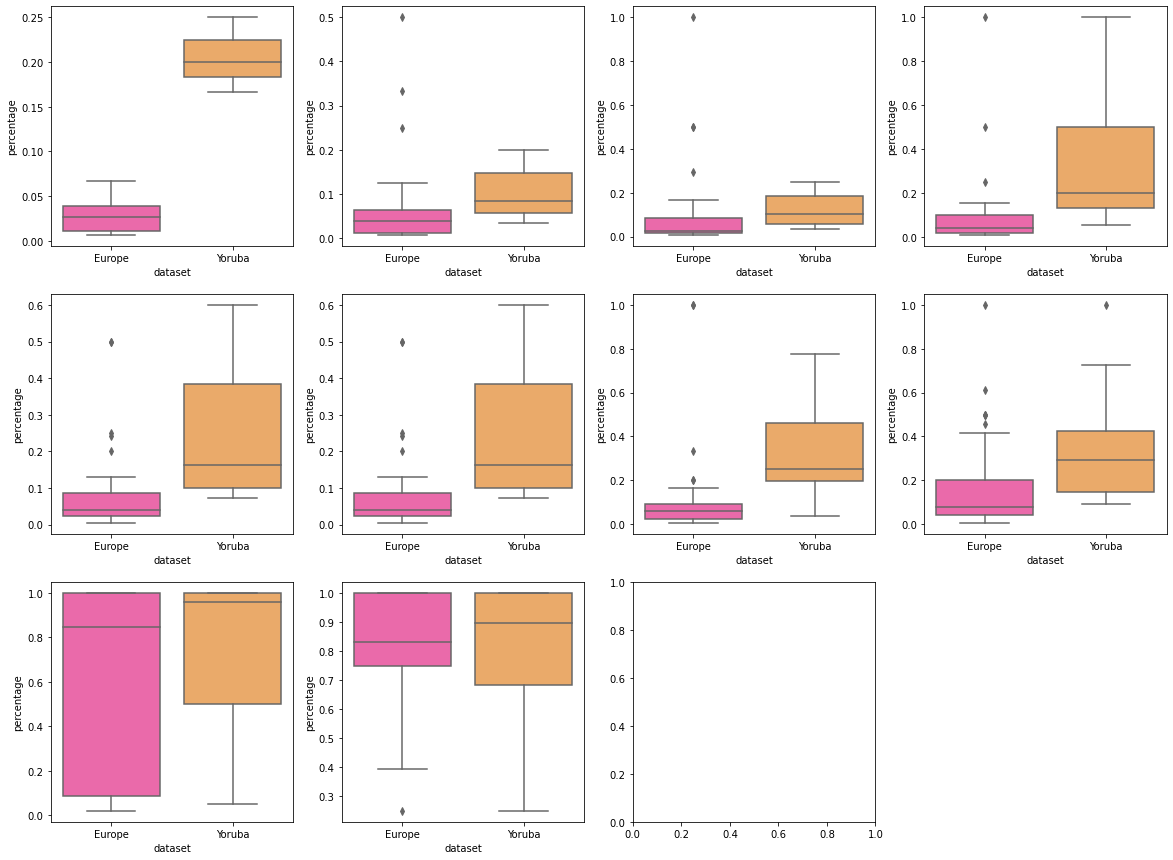

In [7]:
i=1
plt.figure(figsize=(20,15))

for tool in tools:
    df_e, df_y = get_boxplot(tool)
    
    sns.boxplot(data=pd.concat([df_e, df_y]), x='dataset', y='percentage', palette='spring')

    plt.subplot(3, 4, i)
    i+=1

12


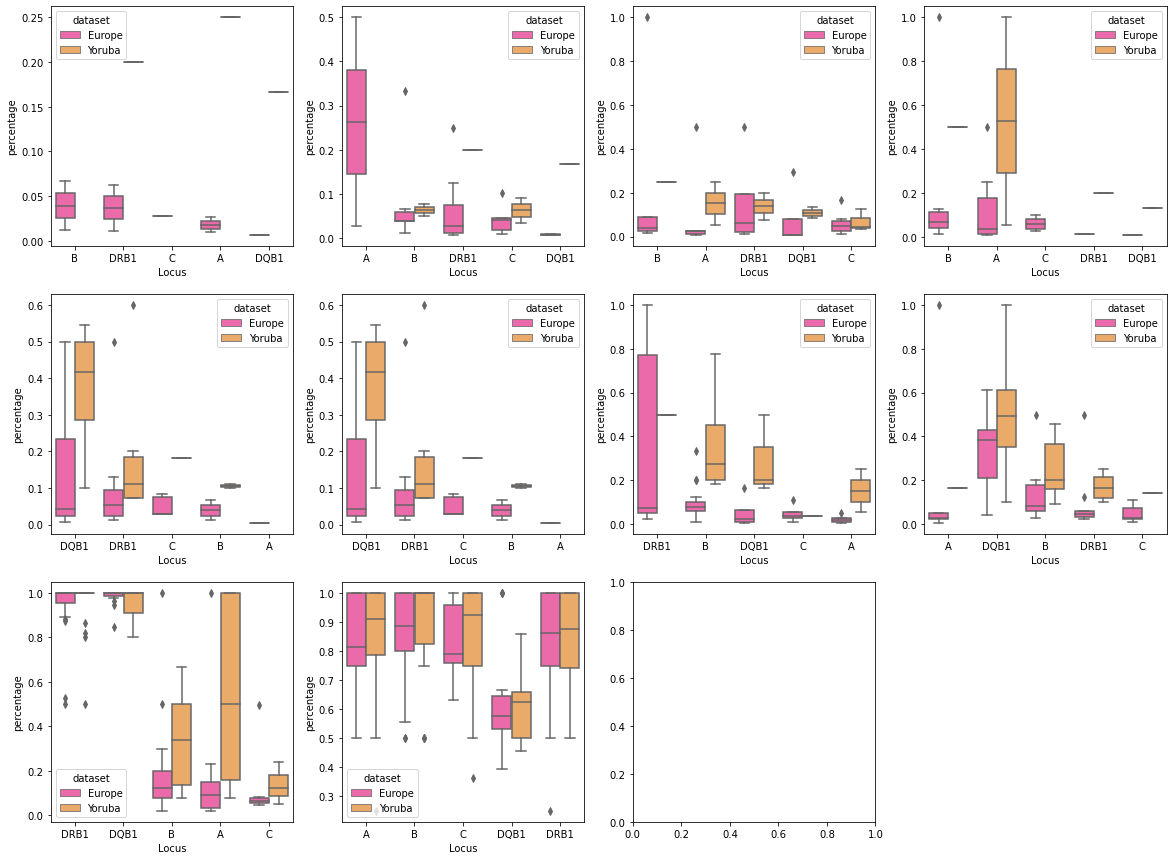

In [25]:
i=1
plt.figure(figsize=(20,15))

for tool in tools:
    df_e, df_y = get_boxplot(tool)
    
    sns.boxplot(data=pd.concat([df_e, df_y]), x='Locus', y='percentage', hue='dataset', palette='spring')

    plt.subplot(3, 4, i)
    i+=1